In [1]:
import numpy as np
from numpy import pi,sqrt,exp
from glob import glob
import matplotlib.pyplot as plt
import os

In [2]:
from params import *

In [3]:
# parent directory
path = os.path.abspath(os.path.join(os.path.abspath('')))

In [4]:
all_files = glob(f'{path}/data/*_R_*000.npz')
all_files.sort()

In [5]:
for i,x in enumerate(all_files):
    print(f"{i:02d} : {x}")

00 : /home/gabriel/Github/SPDE-JKW-Algorithm/data/test_jkw_R_000000.npz


In [6]:
def f_fourier_kernel(k):
    return sqrt(2.*pi)*L*exp(-2.*pi*pi*L*L*k*k)

def spec_analyt(t,k):
    beta = 8.*pi*pi*nu*k*k+alpha
    return f_fourier_kernel(k) * (1.-exp(-beta*t)) / beta

In [7]:
# simulation prefix
P = 0

In [32]:
all_files = glob(f'{path}/data/*_R_{P:02d}*.npz')
all_files.sort()

In [34]:
len(all_files)

38

In [35]:
K = np.fft.fftfreq(N) * N

**Forcing spectrum**

In [10]:
spec_f = np.zeros((N,),dtype=np.float64)

In [11]:
f = all_files[0]
    
npzfile = np.load(f)

f_four = npzfile['f_four']

spec_f = np.mean(np.abs(f_four)**2,axis=0) / N

spec_f_theo = f_fourier_kernel(K)

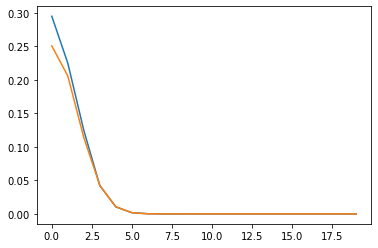

In [12]:
#plt.plot(spec)
scale = 50
plt.plot(K[:N//scale],spec_f[:N//scale])
plt.plot(K[:N//scale],spec_f_theo[:N//scale])
plt.show()

**Solution spectrum**

In [36]:
spec = np.zeros((10,N,),dtype=np.float64)

In [37]:
for f in all_files:
    
    npzfile = np.load(f)

    #v_real = npzfile['v_real']
    v_four = npzfile['v_four']

    spec[0,:] += np.abs(v_four[           0,:])**2 / N
    spec[1,:] += np.abs(v_four[1*N_eval//10,:])**2 / N
    spec[2,:] += np.abs(v_four[2*N_eval//10,:])**2 / N
    spec[3,:] += np.abs(v_four[3*N_eval//10,:])**2 / N
    spec[4,:] += np.abs(v_four[4*N_eval//10,:])**2 / N
    spec[5,:] += np.abs(v_four[5*N_eval//10,:])**2 / N
    spec[6,:] += np.abs(v_four[6*N_eval//10,:])**2 / N
    spec[7,:] += np.abs(v_four[7*N_eval//10,:])**2 / N
    spec[8,:] += np.abs(v_four[8*N_eval//10,:])**2 / N
    spec[9,:] += np.abs(v_four[9*N_eval//10,:])**2 / N
    
spec *= 1./len(all_files)

In [39]:
K = np.fft.fftfreq(N) * N

In [43]:
spec_analyt_list = np.empty((10,N),dtype=np.float64)
spec_analyt(Ttotal,K)

spec_analyt_list[0,:] = spec_analyt(0,K)
spec_analyt_list[1,:] = spec_analyt(1*N_eval//10*dt*N_skip,K)
spec_analyt_list[2,:] = spec_analyt(2*N_eval//10*dt*N_skip,K)
spec_analyt_list[3,:] = spec_analyt(3*N_eval//10*dt*N_skip,K)
spec_analyt_list[4,:] = spec_analyt(4*N_eval//10*dt*N_skip,K)
spec_analyt_list[5,:] = spec_analyt(5*N_eval//10*dt*N_skip,K)
spec_analyt_list[6,:] = spec_analyt(6*N_eval//10*dt*N_skip,K)
spec_analyt_list[7,:] = spec_analyt(7*N_eval//10*dt*N_skip,K)
spec_analyt_list[8,:] = spec_analyt(8*N_eval//10*dt*N_skip,K)
spec_analyt_list[9,:] = spec_analyt(9*N_eval//10*dt*N_skip,K)

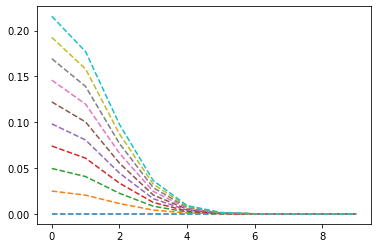

In [44]:
#plt.plot(spec)
scale = 100
for i in range(10):
    #plt.plot(K[:N//scale],spec[i,:N//scale])
    plt.plot(K[:N//scale],spec_analyt_list[i,:N//scale],linestyle='dashed')
plt.show()